# Surface Water Mass Transformation#


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from data_helper import load_data
import brewer2mpl
%matplotlib inline

Sv = 1e6
bmap = brewer2mpl.get_map('Set1', 'Qualitative', 4)
plt.rcParams['axes.color_cycle'] = bmap.mpl_colors
plt.rcParams['font.size'] = 11
plt.rcParams['legend.fontsize'] = 10

## Load pre-computed data for plotting ##

In [5]:
runs = ['control', 'perturb']

# average results from each ensenble member
wmt = dict()
rholevs = dict()
for r in runs:
    wmt[r] = dict()
    rholevs[r] = dict()
    res = load_data('WMT_stu_%s_sigma0_hconst050' % r, year0=55)
    for reg in res.keys():
        # keep only heat flux and salt flux terms
        wmt[r][reg] = res[reg]
        rholevs[r][reg] = res[reg]['rholevs']
        

year = res[reg]['year']

## Southern Ocean Transformation Rates ##

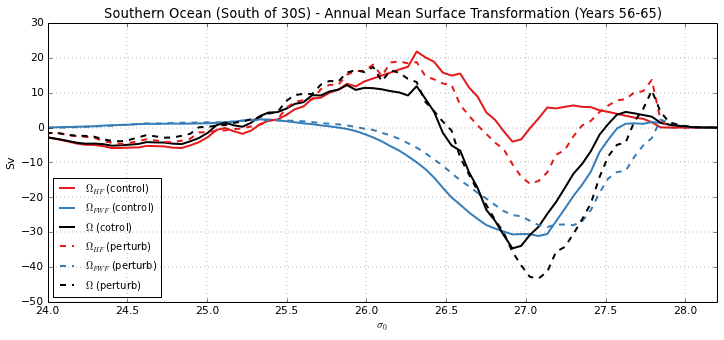

In [29]:
reg = 'so'
#Alevs = np.arange(-40,40,5)+2.5
Alevs = np.arange(-5,5,0.5)+0.25

fig = plt.figure(figsize=(12,5))

for n,expt in enumerate(runs):
    
    wmt_mean = -wmt[expt][reg]['annmean']/Sv

    ls = '-' if n==0 else '--'

    rho = rholevs[expt][reg]

    ax = fig.add_subplot(111)
    ax.plot(rho, wmt_mean[0], ls, rho, wmt_mean[1], ls, linewidth=2)
    ax.plot(rho, wmt_mean[:2].sum(axis=0), ls, color='k', linewidth=2)
    ax.set_color_cycle(plt.rcParams['axes.color_cycle'])

ax.set_xlim([24,28.2])
ax.grid()
ax.set_xlabel(r'$\sigma_0$')

ax.legend([r'$\Omega_{HF}$ (control)', r'$\Omega_{FWF}$ (control)',
           r'$\Omega$ (cotrol)', r'$\Omega_{HF}$ (perturb)',
           r'$\Omega_{FWF}$ (perturb)', r'$\Omega$ (perturb)',], loc='lower left')
ax.set_ylabel('Sv')

plt.title('Southern Ocean (South of 30S) - Annual Mean Surface Transformation (Years 56-65)')

## Discussion ##

The transformations rates $\Omega_{HF}(\sigma_0)$ and $\Omega_{FWF}(\sigma_0)$ quantify the rate at which surface water is made denser (positive values) or lighter due to surface forcing (heat flux and fresh-water flux respectively). Their sum $\Omega(\sigma_0)$ is therefore directly related to the mean overturning circulation in isopycnal coordinates (modulo the uncalculated interior mixing terms). The value of computing transformation rates is that it allows you to understanding the connection between surface thermodynamic forcing and the interior circulation. The mean structure of $\Omega(\sigma_0)$ reflects the well-known sturcutre of the Southern Ocean overturning cells in density coordinates.

The wind perturbation seems to have the strongest effect on the heat-flux-related transformation $\Omega_{HF}$. In the ACC densities (~$\sigma_0 = 27.0$), this transformation goes from near zero in the control to significantly negative for the perturbation. A negative $\Omega_{HF}$ corresponds with __stronger surface heating in the ACC__. This is constistent with what we expect when Ekman pumping is increased, more cold water being exposed to the surface. The net transformation rate $\Omega$ becomes more negative, corresponding with a stronger upper MOC cell (approx. 8 Sv). It is possible that these changes are canceled out by increased interior mixing and do not actually correspond to a change in the isopycnal MOC. I haven't calculated the interior mixing.

There are also some interesting changes for the densest water. Increased negative heat fluxes (presumably in the Antarctic zone) appear to be driving more porduction of very dense water. This could correspond with a slightly stronger AABW cell.